<a href="https://colab.research.google.com/github/ohkt4/pr/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print("[Info] Accesing MNIST..........")
((trainX,trainY),(testX,testY)) = mnist.load_data()

trainX = trainX.reshape((trainX.shape[0],28*28*1))
testX = testX.reshape((testX.shape[0],28*28*1))

trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

[Info] Accesing MNIST..........
11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network...")
Adm = Adam(0.01)
model.compile(loss="categorical_crossentropy", optimizer=Adm, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2416 - accuracy: 0.9269 - val_loss: 0.1524 - val_accuracy: 0.9532
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1234 - accuracy: 0.9642 - val_loss: 0.1138 - val_accuracy: 0.9656
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.1664 - val_accuracy: 0.9613
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9743 - val_loss: 0.1485 - val_accuracy: 0.9611
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9748 - val_loss: 0.1148 - val_accuracy: 0.9716
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9783 - val_loss: 0.1466 - val_accuracy: 0.9643
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0743 - accuracy: 0.9800 - val_loss: 0.

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.93      0.98      0.95      1010
           4       0.99      0.96      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



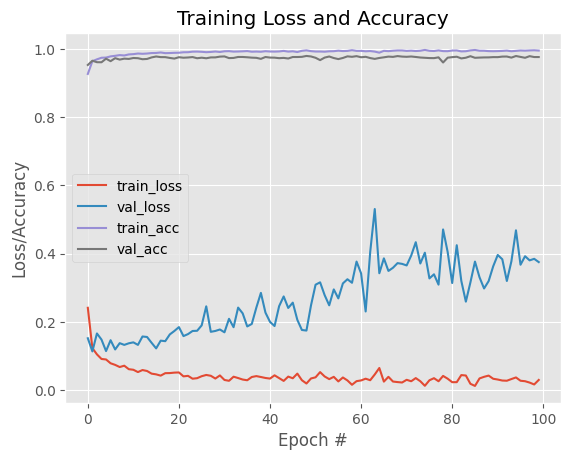

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()